In [1]:
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
from experiment_utils import cp_experiment, interactive_alignment_plot_py3dmol
# %matplotlib widget

Backbone most similar

In [2]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_Similar"
group1_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_similar_dihedral_angle.csv')
group1_info

,RMSD,folder,reference,subfolder,target,mer
0,1.307,../Backbone_Most_Similar,ALPRAL10_2_fixed_backbone.xyz,c4mers,CEJSUF_fixed_backbone.xyz,4
1,0.070,../Backbone_Most_Similar,CGPGAP10_fixed_backbone.xyz,c5mers,PAPGAP_fixed_backbone.xyz,5
2,0.107,../Backbone_Most_Similar,BIHXUL10_fixed_backbone.xyz,c6mers,CINYED_fixed_backbone.xyz,6
3,0.322,../Backbone_Most_Similar,LACSUD_fixed_backbone.xyz,c7mers,TALVAD_fixed_backbone.xyz,7
4,2.303,../Backbone_Most_Similar,EVAPUM_fixed_backbone.xyz,c8mers,UZUKUW_fixed_backbone.xyz,8


In [3]:
group1_res = cp_experiment(
    group1_data_path, 
    zip(group1_info['subfolder'], group1_info['reference'], group1_info['target']), 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'most_similar', 
    cst_D = 0.0,
    save = True)

ALPRAL10_2_fixed_backbone.xyz CEJSUF_fixed_backbone.xyz 0.11
CGPGAP10_fixed_backbone.xyz PAPGAP_fixed_backbone.xyz 0.07
BIHXUL10_fixed_backbone.xyz CINYED_fixed_backbone.xyz 0.11
LACSUD_fixed_backbone.xyz TALVAD_fixed_backbone.xyz 0.32
EVAPUM_fixed_backbone.xyz UZUKUW_fixed_backbone.xyz 0.20


In [7]:
import pandas as pd
cp0_otmol = pd.read_csv('./otmol_output/cp_most_similar_fGW_cstD=0.0_results.csv')
cp0_otmol_ = pd.read_csv('./otmol_output/cp_most_similar_fGW_cstD=0.5_results.csv')
cp0_otmol['assignment'] == cp0_otmol_['assignment']

0    True
1    True
2    True
3    True
4    True
Name: assignment, dtype: bool

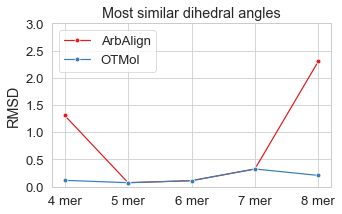

In [8]:
# Data preparation
combined_df = pd.concat([group1_res, group1_info], axis=1).rename(columns={'RMSD': 'ArbAlign', 'RMSD(OTMol)': 'OTMol'})
columns_to_plot = ["ArbAlign", "OTMol"]

# Set the style
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1")  

# Create the plot
plt.figure(figsize=(5,3))
sns.lineplot(data=combined_df, x='mer', y='ArbAlign', marker='o', label='ArbAlign')
sns.lineplot(data=combined_df, x='mer', y='OTMol', marker='o', label='OTMol')

# Customize the plot
plt.title("Most similar dihedral angles")
plt.ylabel("RMSD")
plt.xlabel("")
plt.ylim(0, 3)
plt.xticks(range(4,9), ['4 mer', '5 mer', '6 mer', '7 mer', '8 mer'])
plt.legend()

# Save the figure
plt.savefig('../images/cp_most_similar.png', dpi=300, bbox_inches='tight')

In [9]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_Similar"
molA = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c4mers', 'ALPRAL10_2_fixed_backbone.xyz')))
molB = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c4mers', 'CEJSUF_fixed_backbone.xyz')))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = group1_res['assignment'][0]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, 'ALPRAL10_2', 'CEJSUF', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_Similar"
molA = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c5mers', 'CGPGAP10_fixed_backbone.xyz')))
molB = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c5mers', 'PAPGAP_fixed_backbone.xyz')))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = group1_res['assignment'][1]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_Similar"
molA = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c6mers', 'BIHXUL10_fixed_backbone.xyz')))
molB = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c6mers', 'CINYED_fixed_backbone.xyz')))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = group1_res['assignment'][2]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [12]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_Similar"
molA = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c7mers', 'LACSUD_fixed_backbone.xyz')))
molB = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c7mers', 'TALVAD_fixed_backbone.xyz')))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = group1_res['assignment'][3]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_Similar"
molA = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c8mers', 'EVAPUM_fixed_backbone.xyz')))
molB = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c8mers', 'UZUKUW_fixed_backbone.xyz')))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = group1_res['assignment'][4]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_Similar"
molA = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c4mers', 'ALPRAL10_2_fixed_backbone.xyz')))
molB = next(pybel.readfile("xyz", './arbalign_output/CEJSUF_fixed_backbone-aligned_to-ALPRAL10_2_fixed_backbone.xyz'))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, np.arange(X_A.shape[0], dtype=int), 'ALPRAL10_2', 'CEJSUF', save=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Backbone most different

In [5]:
group2_data_path = "../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_Different"
group2_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_different_dihedral_angle.csv')
group2_info

,RMSD,folder,reference,subfolder,target,mer
0,1.599,../Backbone_Most_Different,CEJSUF_fixed_backbone.xyz,c4mers,RUQVAB_fixed_backbone.xyz,4
1,1.351,../Backbone_Most_Different,CGPSAQ_fixed_backbone.xyz,c5mers,FUDWIK_fixed_backbone.xyz,5
2,1.653,../Backbone_Most_Different,BUYXOI_fixed_backbone.xyz,c6mers,GGAAGG_fixed_backbone.xyz,6
3,1.597,../Backbone_Most_Different,JUXHAL_fixed_backbone.xyz,c7mers,ZORRED_fixed_backbone.xyz,7
4,2.091,../Backbone_Most_Different,NIWHEH_fixed_backbone.xyz,c8mers,cNPF_NMR_backbone.xyz,8


In [6]:
group2_res = cp_experiment(
    group2_data_path,
    zip(group2_info['subfolder'], group2_info['reference'], group2_info['target']), 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'most_different', 
    save = True
    )

CEJSUF_fixed_backbone.xyz RUQVAB_fixed_backbone.xyz 1.55
CGPSAQ_fixed_backbone.xyz FUDWIK_fixed_backbone.xyz 1.26
BUYXOI_fixed_backbone.xyz GGAAGG_fixed_backbone.xyz 1.45
JUXHAL_fixed_backbone.xyz ZORRED_fixed_backbone.xyz 1.55
NIWHEH_fixed_backbone.xyz cNPF_NMR_backbone.xyz 1.86


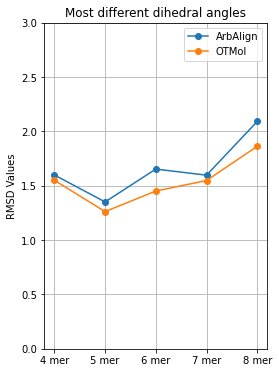

In [12]:
combined_df = pd.concat([group2_res, group2_info], axis=1).rename(columns={'RMSD': 'ArbAlign', 'RMSD(OTMol)': 'OTMol'})
columns_to_plot = ["ArbAlign", "OTMol"]
plt.figure(figsize=(4,6))
for column in columns_to_plot:
    plt.plot(combined_df['mer'], combined_df[column], marker='o', label=column)
plt.title("Most different dihedral angles")
plt.ylabel("RMSD Values")
plt.ylim(0, 3)
plt.xticks(range(4,9), ['4 mer', '5 mer', '6 mer', '7 mer', '8 mer'])
plt.legend()
plt.grid(True)
#plt.savefig('../images/cp_most_different_dihedral_angles.png', dpi=300)

All backbone largest ArbAlign RMSD pair

In [7]:
group3_data_path = "../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/All_Backbone_XYZs"
group3_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/All_Backbone_Largest_RMSD_Pair.csv')
group3_info

,RMSD,folder,reference,subfolder,target,mer
0,1.684,../All_Backbone_XYZs/,ALPRAL10_2_fixed_backbone.xyz,c4mers,RUQVAB_fixed_backbone.xyz,4
1,1.405,../All_Backbone_XYZs/,CGPSAQ_fixed_backbone.xyz,c5mers,DABVIL_fixed_backbone.xyz,5
2,2.183,../All_Backbone_XYZs/,BINJIR_fixed_backbone.xyz,c6mers,DUYTIA_fixed_backbone.xyz,6
3,2.403,../All_Backbone_XYZs/,TALVAD_fixed_backbone.xyz,c7mers,ZOHMIS_fixed_backbone.xyz,7
4,2.875,../All_Backbone_XYZs/,DASXIE_fixed_backbone.xyz,c8mers,EVAPUM_fixed_backbone.xyz,8


In [8]:
group3_res = cp_experiment( 
    group3_data_path,
    zip(group3_info['subfolder'], group3_info['reference'], group3_info['target']), 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'largest_arbalign', 
    save = True
    )

ALPRAL10_2_fixed_backbone.xyz RUQVAB_fixed_backbone.xyz 1.59
CGPSAQ_fixed_backbone.xyz DABVIL_fixed_backbone.xyz 1.26
BINJIR_fixed_backbone.xyz DUYTIA_fixed_backbone.xyz 1.47
TALVAD_fixed_backbone.xyz ZOHMIS_fixed_backbone.xyz 1.16
DASXIE_fixed_backbone.xyz EVAPUM_fixed_backbone.xyz 2.08


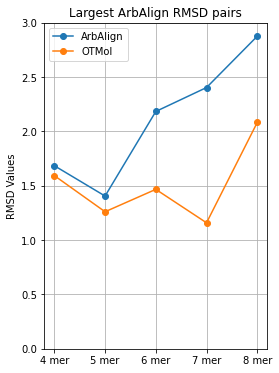

In [11]:
combined_df = pd.concat([group3_res, group3_info], axis=1).rename(columns={'RMSD': 'ArbAlign', 'RMSD(OTMol)': 'OTMol'})
columns_to_plot = ["ArbAlign", "OTMol"]
plt.figure(figsize=(4,6))
for column in columns_to_plot:
    plt.plot(combined_df['mer'], combined_df[column], marker='o', label=column)
plt.title("Largest ArbAlign RMSD pairs")
#plt.xlabel("Index")
plt.ylabel("RMSD Values")
plt.ylim(0, 3)
plt.xticks(range(4,9), ['4 mer', '5 mer', '6 mer', '7 mer', '8 mer'])
plt.legend()
plt.grid(True)
#plt.savefig('../images/cp_largest_arbalign_rmsd_pairs.png', dpi=300)

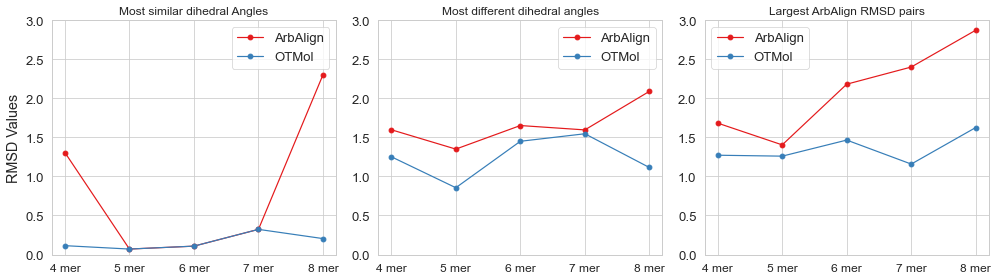

In [13]:
# Create a figure with three subplots side by side
plt.figure(figsize=(14, 4))

# First subplot - Most similar dihedral angles
plt.subplot(131)
combined_df = pd.concat([group1_res, group1_info], axis=1).rename(columns={'RMSD': 'ArbAlign', 'RMSD(OTMol)': 'OTMol'})
columns_to_plot = ["ArbAlign", "OTMol"]
for column in columns_to_plot:
    plt.plot(combined_df['mer'], combined_df[column], marker='o', label=column)
plt.title("Most similar dihedral Angles", fontsize=12)
plt.ylabel("RMSD Values")
plt.ylim(0, 3)
plt.xticks(range(4,9), ['4 mer', '5 mer', '6 mer', '7 mer', '8 mer'], fontsize=12)
plt.legend()
plt.grid(True)

# Second subplot - Most different dihedral angles
plt.subplot(132)
combined_df = pd.concat([group2_res, group2_info], axis=1).rename(columns={'RMSD': 'ArbAlign', 'RMSD(OTMol)': 'OTMol'})
columns_to_plot = ["ArbAlign", "OTMol"]
for column in columns_to_plot:
    plt.plot(combined_df['mer'], combined_df[column], marker='o', label=column)
plt.title("Most different dihedral angles", fontsize=12)
#plt.ylabel("RMSD Values")
plt.ylim(0, 3)
plt.xticks(range(4,9), ['4 mer', '5 mer', '6 mer', '7 mer', '8 mer'], fontsize=12)
plt.legend()
plt.grid(True)

# Third subplot - Largest ArbAlign RMSD pairs
plt.subplot(133)
combined_df = pd.concat([group3_res, group3_info], axis=1).rename(columns={'RMSD': 'ArbAlign', 'RMSD(OTMol)': 'OTMol'})
columns_to_plot = ["ArbAlign", "OTMol"]
for column in columns_to_plot:
    plt.plot(combined_df['mer'], combined_df[column], marker='o', label=column)
plt.title("Largest ArbAlign RMSD pairs", fontsize=12)
#plt.ylabel("RMSD Values")
plt.ylim(0, 3)
plt.xticks(range(4,9), ['4 mer', '5 mer', '6 mer', '7 mer', '8 mer'], fontsize=12)
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure
plt.savefig('../images/cp_three_datasets.png', dpi=300, bbox_inches='tight')
plt.show()

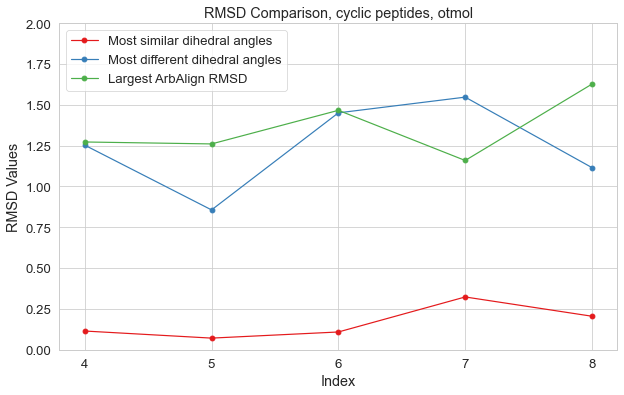

In [14]:
combined_df = pd.concat([
    group1_info['mer'], 
    group1_res.rename(columns={'RMSD(OTMol)': 'Most similar dihedral angles'}), 
    group2_res.rename(columns={'RMSD(OTMol)': 'Most different dihedral angles'}), 
    group3_res.rename(columns={'RMSD(OTMol)': 'Largest ArbAlign RMSD'})
    ], axis=1)
columns_to_plot = ["Most similar dihedral angles", "Most different dihedral angles", "Largest ArbAlign RMSD"]
plt.figure(figsize=(10,6))
for column in columns_to_plot:
    plt.plot(combined_df['mer'], combined_df[column], marker='o', label=column)
plt.title("RMSD Comparison, cyclic peptides, otmol")
plt.xlabel("Index")
plt.ylabel("RMSD Values")
plt.ylim(0, 2)
plt.xticks(range(4,9))
plt.legend()
plt.grid(True)

In [15]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Cyclic_Peptide/Backbone_Most_Similar"
molA = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c4mers', 'ALPRAL10_2_fixed_backbone.xyz')))
molB = next(pybel.readfile("xyz", os.path.join(group1_data_path, 'c4mers', 'CEJSUF_fixed_backbone.xyz')))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = group1_res['assignment'][0]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, 'ALPRAL10_2_fixed_backbone', 'CEJSUF_fixed_backbone')